# Предиктивный анализ износа колёс локомотивов

In [160]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm, trange

In [161]:
df = pd.read_csv('../Data/depo-measurements.csv')
df_test = pd.read_csv('../Data/depo-features-test.csv')

In [162]:
df.shape

(32812, 8)

In [163]:
df.dtypes

wheel_id            int64
flange_height     float64
flange_width      float64
qr                float64
tread_wear        float64
rim_thickness     float64
wheel_diameter    float64
date                int64
dtype: object

In [164]:
df.head(10)

,wheel_id,flange_height,flange_width,qr,tread_wear,rim_thickness,wheel_diameter,date
0,1331,32.27,30.08,10.52,2.27,75.25,1220.50,61
1,8608,31.34,31.71,10.42,1.34,57.23,1184.46,61
2,8609,31.30,30.85,8.36,1.30,56.35,1182.70,61
3,8612,31.24,28.07,8.74,1.24,73.01,1216.03,61
4,8613,30.42,29.37,10.13,0.42,72.05,1214.11,61
5,8614,32.50,28.49,7.79,2.50,76.67,1223.35,61
6,8615,28.08,30.09,8.27,-1.92,75.21,1220.41,61
7,8616,32.22,30.33,9.43,2.22,73.73,1217.45,61
8,8625,30.60,31.17,10.51,0.60,70.12,1210.24,61
9,8618,30.42,31.86,10.66,0.42,79.10,1228.20,61


In [165]:
df_test.shape

(668, 4)

In [166]:
df_test.head(10)

,previous_flange_width,previous_flange_height,previous_rim_thickness,previous_wheel_diameter
0,29.57,31.68,88.73,0.00
1,31.29,34.42,85.96,1241.92
2,30.64,33.60,66.04,1202.08
3,29.46,33.35,0.00,0.00
4,28.68,30.80,69.42,0.00
5,32.95,29.71,90.20,1250.40
6,29.34,35.11,74.49,1218.98
7,25.03,35.90,85.95,1239.00
8,28.96,31.20,69.25,1201.00
9,32.77,29.25,50.49,1170.98


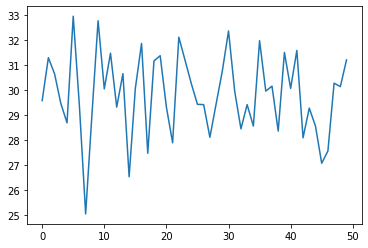

In [167]:
df_test['previous_flange_width'][:50].plot()

In [168]:
df_test.describe()

,previous_flange_width,previous_flange_height,previous_rim_thickness,previous_wheel_diameter
count,668.000000,668.000000,668.000000,668.000000
mean,29.740344,32.444985,78.496946,914.493278
std,1.543623,1.753237,16.368573,537.130533
min,24.700000,27.210000,0.000000,0.000000
25%,28.727500,31.457500,72.800000,0.000000
50%,29.740000,32.440000,82.205000,1224.000000
75%,30.782500,33.590000,88.790000,1242.000000
max,33.320000,37.350000,105.200000,1280.400000


In [169]:
len(df.wheel_id.unique())

14576

In [170]:
df.wheel_id.unique()[:20]

array([1331, 8608, 8609, 8612, 8613, 8614, 8615, 8616, 8625, 8618, 8619,
       8620, 8621, 8622, 8623, 8626, 8607, 8606, 8605, 8604], dtype=int64)

In [171]:
df[ df.wheel_id == 1331 ]

,wheel_id,flange_height,flange_width,qr,tread_wear,rim_thickness,wheel_diameter,date
0,1331,32.27,30.08,10.52,2.27,75.25,1220.50,61
360,1331,33.09,28.78,9.69,3.09,66.79,1203.58,66
3623,1331,34.26,28.81,11.17,4.26,75.99,1221.97,110
4524,1331,28.24,29.78,8.48,0.29,65.83,1201.66,117
6057,1331,34.34,28.56,11.19,4.34,78.20,1226.40,121
17023,1331,34.96,28.07,11.13,4.96,74.47,1217.44,145
17030,1331,34.96,28.07,11.13,4.96,74.47,1221.26,145
17045,1331,34.96,28.07,11.13,4.96,74.47,1221.26,145
17071,1331,34.96,28.07,11.13,4.96,74.47,1217.44,145
17405,1331,32.60,29.02,11.13,0.27,69.74,0.00,146


In [172]:
df_wheels = {}
for wheel_id in df.wheel_id.unique():
    df_wheels[wheel_id] = df[ df.wheel_id == wheel_id ]

In [173]:
np.arange(len(df))

array([    0,     1,     2, ..., 32809, 32810, 32811])

In [174]:
# df['previous_flange_height'] = 0
df['previous_flange_width'] = 0
df['flange_width_diff'] = 0
# df['previous_qr'] = 0
# df['previous_tread_wear'] = 0
# df['previous_rim_thickness'] = 0
# df['previous_wheel_diameter'] = 0

df['days_diff'] = 0

In [131]:
df.head()

,wheel_id,flange_height,flange_width,qr,tread_wear,rim_thickness,wheel_diameter,date,previous_flange_width
0,1331,32.27,30.08,10.52,2.27,75.25,1220.50,61,0
1,8608,31.34,31.71,10.42,1.34,57.23,1184.46,61,0
2,8609,31.30,30.85,8.36,1.30,56.35,1182.70,61,0
3,8612,31.24,28.07,8.74,1.24,73.01,1216.03,61,0
4,8613,30.42,29.37,10.13,0.42,72.05,1214.11,61,0


In [177]:
df_wheel = df[ df.wheel_id == 1331 ]
prev_index = -1
for index, row in tqdm(df_wheel.iterrows()):
    if prev_index == -1:
        prev_index = index
        continue
    
#     df_wheel.loc[index, 'previous_flange_height'] = df_wheel.loc[prev_index, 'flange_height']
    df_wheel.loc[index, 'previous_flange_width'] = df_wheel.loc[prev_index, 'flange_width']
    df_wheel.loc[index, 'days_diff'] = df_wheel.loc[index, 'date'] - df_wheel.loc[prev_index, 'date']
    df_wheel.loc[index, 'flange_width_diff'] = df_wheel.loc[prev_index, 'flange_width'] - df_wheel.loc[index, 'flange_width'] 
#     df_wheel.loc[index, 'previous_qr'] = df_wheel.loc[prev_index, 'qr']
#     df_wheel.loc[index, 'previous_tread_wear'] = df_wheel.loc[prev_index, 'tread_wear']
#     df_wheel.loc[index, 'previous_rim_thickness'] = df_wheel.loc[prev_index, 'rim_thickness']
#     df_wheel.loc[index, 'previous_wheel_diameter'] = df_wheel.loc[prev_index, 'wheel_diameter']
    prev_index = index

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [178]:
df_wheel

,wheel_id,flange_height,flange_width,qr,tread_wear,rim_thickness,wheel_diameter,date,previous_flange_width,flange_width_diff,days_diff
0,1331,32.27,30.08,10.52,2.27,75.25,1220.50,61,0.00,0.00,0
360,1331,33.09,28.78,9.69,3.09,66.79,1203.58,66,30.08,1.30,5
3623,1331,34.26,28.81,11.17,4.26,75.99,1221.97,110,28.78,-0.03,44
4524,1331,28.24,29.78,8.48,0.29,65.83,1201.66,117,28.81,-0.97,7
6057,1331,34.34,28.56,11.19,4.34,78.20,1226.40,121,29.78,1.22,4
17023,1331,34.96,28.07,11.13,4.96,74.47,1217.44,145,28.56,0.49,24
17030,1331,34.96,28.07,11.13,4.96,74.47,1221.26,145,28.07,0.00,0
17045,1331,34.96,28.07,11.13,4.96,74.47,1221.26,145,28.07,0.00,0
17071,1331,34.96,28.07,11.13,4.96,74.47,1217.44,145,28.07,0.00,0
17405,1331,32.60,29.02,11.13,0.27,69.74,0.00,146,28.07,-0.95,1


In [192]:
df_new = pd.DataFrame(columns = df.columns)

for wheel_id in tqdm(df.wheel_id.unique()):
    df_wheel = df[ df.wheel_id == wheel_id ]
    prev_index = -1
    for index, row in df_wheel.iterrows():
        if prev_index == -1:
            prev_index = index
            continue

#         df_wheel.loc[index, 'previous_flange_height'] = df_wheel.loc[prev_index, 'flange_height']
        df_wheel.loc[index, 'previous_flange_width'] = df_wheel.loc[prev_index, 'flange_width']
#         df_wheel.loc[index, 'previous_qr'] = df_wheel.loc[prev_index, 'qr']
#         df_wheel.loc[index, 'previous_tread_wear'] = df_wheel.loc[prev_index, 'tread_wear']
#         df_wheel.loc[index, 'previous_rim_thickness'] = df_wheel.loc[prev_index, 'rim_thickness']
#         df_wheel.loc[index, 'previous_wheel_diameter'] = df_wheel.loc[prev_index, 'wheel_diameter']
        df_wheel.loc[index, 'flange_width_diff'] = df_wheel.loc[prev_index, 'flange_width'] - df_wheel.loc[index, 'flange_width'] 
        df_wheel.loc[index, 'days_diff'] = df_wheel.loc[index, 'date'] - df_wheel.loc[prev_index, 'date']
        prev_index = index
    
    df_new = pd.concat([df_new, df_wheel])
    #if (wheel_id == 8612): break

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [194]:
df_new.to_csv('measurements_diff.csv')

In [195]:
print(df_new.shape)
df_new.head(2)

(32812, 11)


,wheel_id,flange_height,flange_width,qr,tread_wear,rim_thickness,wheel_diameter,date,previous_flange_width,flange_width_diff,days_diff
0,1331,32.27,30.08,10.52,2.27,75.25,1220.50,61,0.00,0.0,0
360,1331,33.09,28.78,9.69,3.09,66.79,1203.58,66,30.08,1.3,5


In [138]:
df_new.diff()

,wheel_id,flange_height,flange_width,qr,tread_wear,rim_thickness,wheel_diameter,date,previous_flange_width
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,0,0.82,-1.30,-0.83,0.82,-8.46,-16.92,5,30.08
3623,0,1.17,0.03,1.48,1.17,9.20,18.39,44,-1.30
4524,0,-6.02,0.97,-2.69,-3.97,-10.16,-20.31,7,0.03
6057,0,6.10,-1.22,2.71,4.05,12.37,24.74,4,0.97
...,...,...,...,...,...,...,...,...,...
32807,-1,-0.43,-1.58,-2.54,-0.43,-0.32,-1.00,0,0.00
32808,-4,0.55,0.06,0.88,0.55,0.98,4.00,0,0.00
32809,-1,-0.07,0.22,0.41,-0.07,-0.54,-1.00,0,0.00
32810,-2,0.26,1.03,1.15,0.26,-0.30,0.00,0,0.00


9


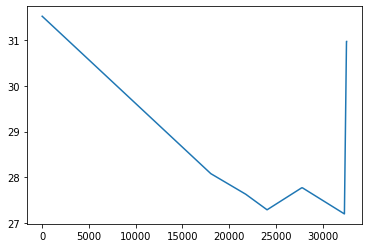

In [85]:
df_wheel = df[ df.wheel_id == 8622 ]
print(len(df_wheel))
df_wheel['flange_width'].plot()

In [86]:
df_wheel

,wheel_id,flange_height,flange_width,qr,tread_wear,rim_thickness,wheel_diameter,date,previous_flange_height,previous_flange_width,previous_qr,previous_tread_wear,previous_rim_thickness,previous_wheel_diameter
13,8622,30.29,31.52,11.03,0.29,72.45,1214.90,61,0,0,0,0,0,0
18048,8622,30.52,28.08,8.30,0.52,69.83,1208.71,148,0,0,0,0,0,0
21782,8622,30.56,27.63,8.19,0.56,70.43,0.00,158,0,0,0,0,0,0
24062,8622,30.69,27.29,7.93,0.69,70.83,0.00,169,0,0,0,0,0,0
27761,8622,30.52,27.77,9.00,0.52,65.16,0.00,186,0,0,0,0,0,0
27847,8622,30.52,27.77,9.00,0.52,65.16,0.00,186,0,0,0,0,0,0
32333,8622,30.62,27.20,8.53,0.62,64.36,0.00,207,0,0,0,0,0,0
32554,8622,29.99,30.97,9.88,-0.01,58.39,0.00,210,0,0,0,0,0,0
32559,8622,29.99,30.97,9.88,-0.01,58.39,0.00,210,0,0,0,0,0,0


In [106]:
df_new['flange_width'].describe()

count    32812.000000
mean        29.307854
std          1.744670
min         -2.160000
25%         28.100000
50%         29.310000
75%         30.520000
max         60.750000
Name: flange_width, dtype: float64

In [107]:
df_new['date'].describe()

count     32812
unique      151
top         129
freq        880
Name: date, dtype: int64

In [113]:
df_group = df_new.groupby(['wheel_id']).mean()
df_group.shape

(14576, 12)

In [114]:
df_group.head()

,flange_height,flange_width,qr,tread_wear,rim_thickness,wheel_diameter,previous_flange_height,previous_flange_width,previous_qr,previous_tread_wear,previous_rim_thickness,previous_wheel_diameter
wheel_id,,,,,,,,,,,,
0,31.63,27.70,8.35,1.63,81.21,1231.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32.32,29.33,8.84,2.32,82.33,1231.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30.19,30.51,7.93,0.19,74.01,1218.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30.19,30.49,8.05,0.19,71.83,1216.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.02,28.67,7.18,0.02,81.64,1228.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
df_group['flange_width'].describe()

count    14576.000000
mean        29.255340
std          1.611063
min         23.240000
25%         28.090000
50%         29.250000
75%         30.450000
max         36.036000
Name: flange_width, dtype: float64

In [78]:
len(df_new[ df_new.previous_flange_height == 0 ])

14583

In [115]:
df_wheel

,wheel_id,flange_height,flange_width,qr,tread_wear,rim_thickness,wheel_diameter,date,previous_flange_height,previous_flange_width,previous_qr,previous_tread_wear,previous_rim_thickness,previous_wheel_diameter
13,8622,30.29,31.52,11.03,0.29,72.45,1214.90,61,0,0,0,0,0,0
18048,8622,30.52,28.08,8.30,0.52,69.83,1208.71,148,0,0,0,0,0,0
21782,8622,30.56,27.63,8.19,0.56,70.43,0.00,158,0,0,0,0,0,0
24062,8622,30.69,27.29,7.93,0.69,70.83,0.00,169,0,0,0,0,0,0
27761,8622,30.52,27.77,9.00,0.52,65.16,0.00,186,0,0,0,0,0,0
27847,8622,30.52,27.77,9.00,0.52,65.16,0.00,186,0,0,0,0,0,0
32333,8622,30.62,27.20,8.53,0.62,64.36,0.00,207,0,0,0,0,0,0
32554,8622,29.99,30.97,9.88,-0.01,58.39,0.00,210,0,0,0,0,0,0
32559,8622,29.99,30.97,9.88,-0.01,58.39,0.00,210,0,0,0,0,0,0


In [92]:
df_wheel = df[ df.wheel_id == 8622 ]

prev_index = -1
for index, row in df_wheel.iterrows():
    if prev_index == -1:
        prev_index = index
        continue

    print(index, prev_index, df_wheel.loc[prev_index, 'flange_width'], df_wheel.loc[index, 'previous_flange_width'])
    prev_index = index


18048 13 31.52 0
21782 18048 28.08 0
24062 21782 27.63 0
27761 24062 27.29 0
27847 27761 27.77 0
32333 27847 27.77 0
32554 32333 27.2 0
32559 32554 30.97 0


## Фильтрация значений толщины гребня

In [198]:
df_new.head(20)

,wheel_id,flange_height,flange_width,qr,tread_wear,rim_thickness,wheel_diameter,date,previous_flange_width,flange_width_diff,days_diff
0,1331,32.27,30.08,10.52,2.27,75.25,1220.50,61,0.00,0.00,0
360,1331,33.09,28.78,9.69,3.09,66.79,1203.58,66,30.08,1.30,5
3623,1331,34.26,28.81,11.17,4.26,75.99,1221.97,110,28.78,-0.03,44
4524,1331,28.24,29.78,8.48,0.29,65.83,1201.66,117,28.81,-0.97,7
6057,1331,34.34,28.56,11.19,4.34,78.20,1226.40,121,29.78,1.22,4
17023,1331,34.96,28.07,11.13,4.96,74.47,1217.44,145,28.56,0.49,24
17030,1331,34.96,28.07,11.13,4.96,74.47,1221.26,145,28.07,0.00,0
17045,1331,34.96,28.07,11.13,4.96,74.47,1221.26,145,28.07,0.00,0
17071,1331,34.96,28.07,11.13,4.96,74.47,1217.44,145,28.07,0.00,0
17405,1331,32.60,29.02,11.13,0.27,69.74,0.00,146,28.07,-0.95,1


In [202]:
df_wheel = df_new[ df_new.wheel_id == 1331 ]
prev_index = -1
for index, row in tqdm(df_wheel.iterrows()):
    if prev_index == -1:
        prev_index = index
        continue
    

    if (df_wheel.loc[index, 'days_diff'] < 10 or df_wheel.loc[index, 'days_diff'] > 50) or (df_wheel.loc[index, 'flange_width_diff'] <= 0):
            df_wheel = df_wheel.drop([index])

    prev_index = index

In [204]:
df_wheel.head(20)

,wheel_id,flange_height,flange_width,qr,tread_wear,rim_thickness,wheel_diameter,date,previous_flange_width,flange_width_diff,days_diff
0,1331,32.27,30.08,10.52,2.27,75.25,1220.50,61,0.00,0.00,0
17023,1331,34.96,28.07,11.13,4.96,74.47,1217.44,145,28.56,0.49,24
28848,1331,32.64,27.49,8.86,0.65,68.64,1203.78,189,29.02,1.53,43
31413,1331,32.72,27.28,9.07,2.72,68.24,1200.00,202,27.49,0.21,13


In [210]:
df_new = pd.read_csv('measurements_diff.csv')

In [212]:
df_new.head()

,Unnamed: 0,wheel_id,flange_height,flange_width,qr,tread_wear,rim_thickness,wheel_diameter,date,previous_flange_width,flange_width_diff,days_diff
0,0,1331,32.27,30.08,10.52,2.27,75.25,1220.50,61,0.00,0.00,0
1,360,1331,33.09,28.78,9.69,3.09,66.79,1203.58,66,30.08,1.30,5
2,3623,1331,34.26,28.81,11.17,4.26,75.99,1221.97,110,28.78,-0.03,44
3,4524,1331,28.24,29.78,8.48,0.29,65.83,1201.66,117,28.81,-0.97,7
4,6057,1331,34.34,28.56,11.19,4.34,78.20,1226.40,121,29.78,1.22,4


In [221]:
df_new_filt = pd.DataFrame(columns = df_new.columns)

for wheel_id in tqdm(df_new.wheel_id.unique()):
    df_wheel = df_new[ df_new.wheel_id == wheel_id ]
    prev_index = -1
    for index, row in df_wheel.iterrows():
        if prev_index == -1:
            prev_index = index
            df_wheel = df_wheel.drop([index])
            continue

        if (df_wheel.loc[index, 'days_diff'] < 10 or df_wheel.loc[index, 'days_diff'] > 50) or (df_wheel.loc[index, 'flange_width_diff'] <= 0):
            df_wheel = df_wheel.drop([index])
    
    df_new_filt = pd.concat([df_new_filt, df_wheel])
    #if (wheel_id == 8612): break

In [222]:
df_new_filt.shape

(5651, 12)

In [223]:
df_new_filt.head(50)

,Unnamed: 0,wheel_id,flange_height,flange_width,qr,tread_wear,rim_thickness,wheel_diameter,date,previous_flange_width,flange_width_diff,days_diff
5,17023,1331,34.96,28.07,11.13,4.96,74.47,1217.44,145,28.56,0.49,24
10,28848,1331,32.64,27.49,8.86,0.65,68.64,1203.78,189,29.02,1.53,43
12,31413,1331,32.72,27.28,9.07,2.72,68.24,1200.00,202,27.49,0.21,13
15,21970,8608,30.11,27.29,7.43,0.11,56.14,0.00,158,27.33,0.04,10
16,24096,8608,30.58,26.68,7.19,0.58,55.50,0.00,169,27.29,0.61,11
19,32306,8608,30.05,27.69,7.67,0.05,49.92,0.00,207,28.40,0.71,21
22,21971,8609,30.81,25.36,6.68,0.81,53.89,0.00,158,25.79,0.43,10
23,24095,8609,31.26,24.80,7.06,1.26,53.16,0.00,169,25.36,0.56,11
26,32305,8609,30.76,25.82,6.92,0.76,47.84,0.00,207,27.16,1.34,21
29,21973,8612,30.00,26.32,6.75,0.00,69.24,0.00,158,26.56,0.24,10
